## This method is only used for "skewed data" distributation 
 

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv(r'c:\Users\Admin\Documents\DataSets\placement.csv',encoding='Latin')

In [3]:
df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


<Axes: xlabel='placement_exam_marks', ylabel='Density'>

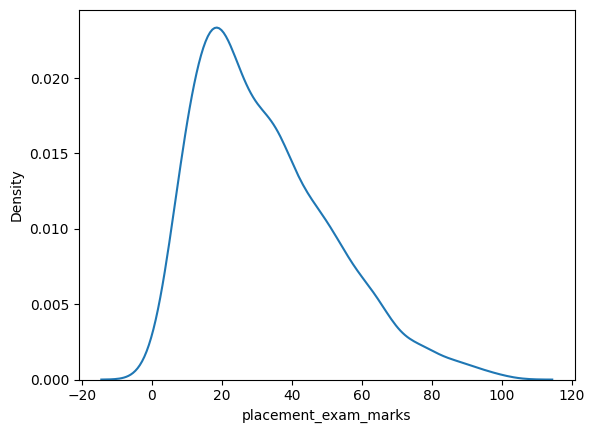

In [4]:
sns.kdeplot(df['placement_exam_marks'])

Hence the distribuation is right skewed , we will apply IQR Method to find the outliers 

In [5]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

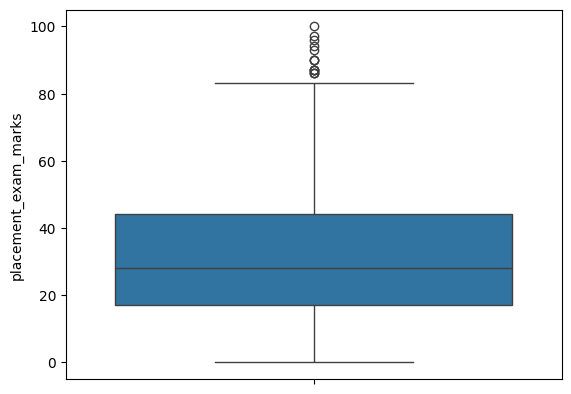

In [6]:
sns.boxplot(df['placement_exam_marks'])

#### IQR Method

In [ ]:
#Finding IQR (inter quantile Range)
percentile_25 = df['placement_exam_marks'].quantile(0.25)
percentile_75 = df['placement_exam_marks'].quantile(0.75)

In [8]:
percentile_25

np.float64(17.0)

In [10]:
percentile_75

np.float64(44.0)

iqr = (upper_limit - lower_limit)

In [11]:
iqr = percentile_75 - percentile_25

In [13]:
iqr.item()

27.0

In [14]:
upper_limit = percentile_75 + 1.5 * iqr
lower_limit = percentile_25 - 1.5 * iqr

In [16]:
print('upper Limit:',upper_limit)
print('Lower Limit:',lower_limit)

upper Limit: 84.5
Lower Limit: -23.5


In [17]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [18]:
df[df['placement_exam_marks']<lower_limit]

,cgpa,placement_exam_marks,placed


### Trimming 

In [20]:
df[(df['placement_exam_marks']<upper_limit ) & (df['placement_exam_marks']>lower_limit)]

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


### Capping

In [21]:
df['placement_exam_marks']=np.where(
    df['placement_exam_marks']>upper_limit,
    upper_limit,
    np.where(
        df['placement_exam_marks']<lower_limit,
        lower_limit,
        df['placement_exam_marks']
    )
)

In [22]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.136500
std        18.865419
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max        84.500000
Name: placement_exam_marks, dtype: float64

## Hence Earlier the max value is 100 now it is 84.5 , therefore outliers are removed totally 

<Axes: ylabel='placement_exam_marks'>

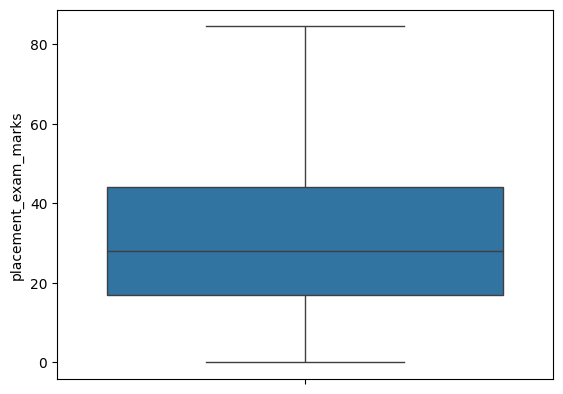

In [24]:
sns.boxplot(df['placement_exam_marks'])